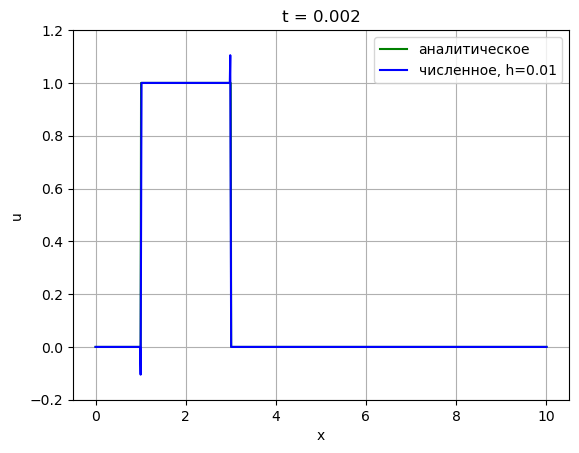

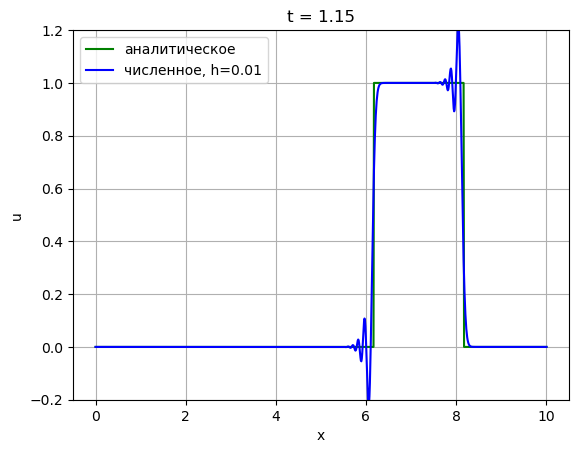

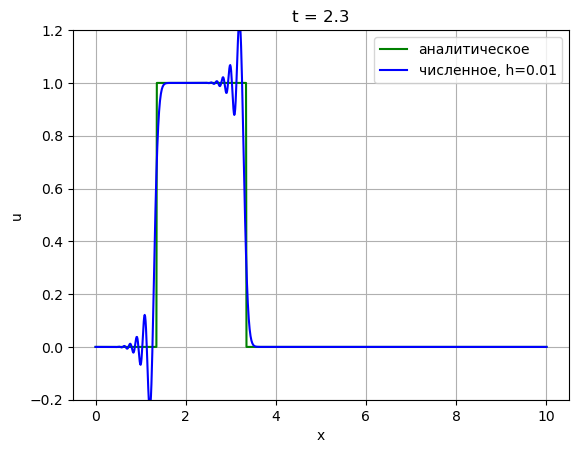

In [1]:
import numpy as np
import matplotlib.pyplot as plt

h1 = 10**(-2)
h2 = 10**(-3)
x0 = 2
eps = 1
a = 0
b = 10
T = 2.3
v = 4.5 # 4 и -3
const = 0.7
tau1 = h1 * const / np.abs(v)
tau2 = h2 * const / np.abs(v)

A1 = (v * tau1) / (2 * h1) + (tau1**2 * v**2) / (2 * h1**2)        # коэффициент при u_n,j-1
B1 = 1 - (2 * tau1**2 * v**2) / (2 * h1**2)               # коэффициент при u_n,j
C1 = (tau1**2 * v**2) / (2 * h1**2) - (v * tau1) / (2 * h1) # коэффициент при u_n,j+1

A2 = (v * tau2) / (2 * h2) + (tau2**2 * v**2) / (2 * h2**2)
B2 = 1 - (2 * tau2**2 * v**2) / (2 * h2**2)
C2 = (tau2**2 * v**2) / (2 * h2**2) - (v * tau2) / (2 * h2)

def ploting(x, t, u):
    plt.plot(x, real(x, t[n], v, x0, eps), color='g', label='аналитическое')
    plt.plot(x, u, color='b', label='численное, h=0.01')
    plt.ylim(-0.2, 1.2)
    plt.xlabel('x')
    plt.ylabel('u')                              #построение графиков
    plt.title(f't = {round(t[n], 3)}')
    plt.grid()
    plt.legend()
    plt.show()

ksi = lambda x, x0, eps: np.abs(x - x0) / eps
phi1 = lambda x, x0, eps: np.heaviside(1 - ksi(x, x0, eps), 0)
phi2 = lambda x, x0, eps: phi1(x, x0, eps) * (1 - (ksi(x, x0, eps))**2)
phi3 = lambda x, x0, eps: phi1(x, x0, eps) * np.exp((-(ksi(x, x0, eps))**2) / np.abs(1 - (ksi(x, x0, eps))**2))
phi4 = lambda x, x0, eps: phi1(x, x0, eps) * (np.cos((np.pi/2) * ksi(x, x0, eps)))**3
real = lambda x, t, v, x0, eps: phi1((x-v*t) % (b-a), x0, eps)

if v > 0:
    x1 = np.linspace(a, b + h1, int((b - a + h1) / h1) + 1)
    x2 = np.linspace(a, b + h2, int((b - a + h2) / h2) + 1)
    def method(u0, M, A, B, C):
        u1 = np.zeros(M)
        u1[1:M - 1] = A * u0[:-2] + B * u0[1:-1] + C * u0[2:]
        u1[-2] = A * u0[-3] + B * u0[-2] + C * u0[-1]          
        u1[0] = u1[-2]
        u1[-1] = u0[-1] - (v*tau1/h1) * (u0[-1] - u0[-2])
        return u1
else:
    x1 = np.linspace(a - h1, b, int((b - a + h1) / h1) + 1)
    x2 = np.linspace(a - h1, b, int((b - a + h2) / h2) + 1)
    def method(u0, M):
        u1 = np.zeros(M1)
        u1[1:M - 1] = A * u0[:-2] + B * u0[1:-1] + C * u0[2:]
        u1[1] = A * u0[0] + B * u0[1] + C * u0[2]
        u1[-1] = u1[1]
        u1[0] = u0[0] - (v*tau1/h1) * (u0[1] - u0[0])
        return u1

M1 = len(x1)
M2 = len(x2)
t1 = np.linspace(0, T, int(T/tau1) + 1)
T1 = len(t1)
t2 = np.linspace(0, T, int(T/tau2) + 1)
T2 = len(t2)
u0x1 = phi1(x1, x0, eps)
u0x2 = phi1(x2, x0, eps)

r1 = np.array([])
for n in range(1,T1):
    u1 = method(u0x1, M1, A1, B1, C1)
    if n == 1:
        ploting(x1, t1, u1)
    elif n == T1 // 2:
        ploting(x1, t1, u1)
    elif n == T1 - 1:
        ploting(x1, t1, u1)
    r1 = np.append(r1, np.max(np.abs(real(x1, t1[n], v, x0, eps) - u1)))
    u0x1 = u1

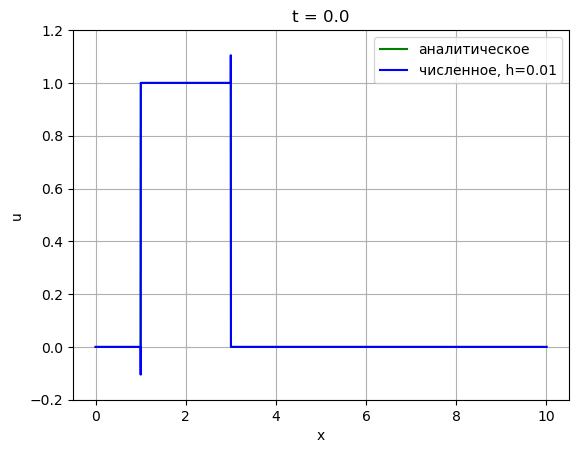

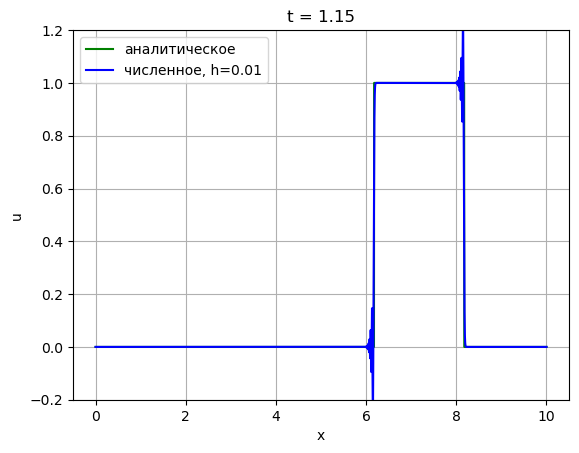

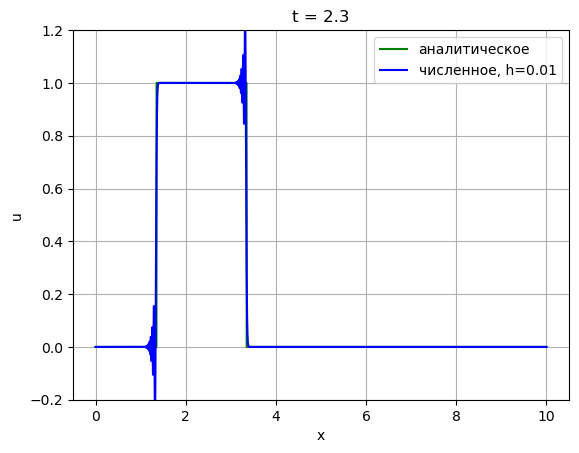

In [2]:
r2 = np.array([])
for n in range(1,T2):
    u2 = method(u0x2, M2, A2, B2, C2)
    if n == 1:
        ploting(x2, t2, u2)
    elif n == T2 // 2:
        ploting(x2, t2, u2)
    elif n == T2 - 1:
        ploting(x2, t2, u2)
    r2 = np.append(r2, np.max(np.abs(real(x2, t2[n], v, x0, eps) - u2)))
    u0x2 = u2

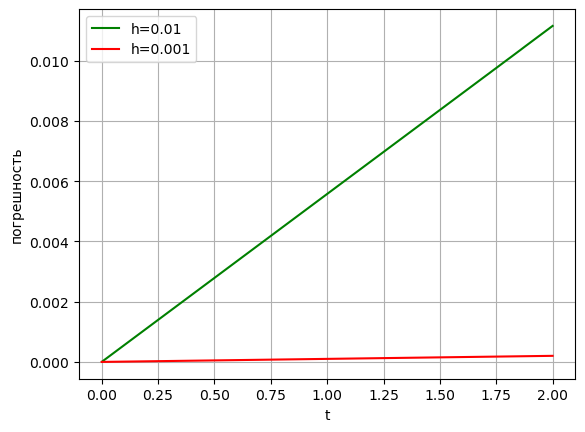

In [44]:
plt.plot(t1[1:], r1, color='g', label='h=0.01')
plt.plot(t2[1:], r2, color='r', label='h=0.001')
plt.grid()
plt.ylabel('погрешность')
plt.xlabel('t')
plt.legend()
plt.show()